<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [70]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fake = pd.Series([39, 3, 2, 1, 2, 4, 6, 6, 5, 33], index=range(1,11))


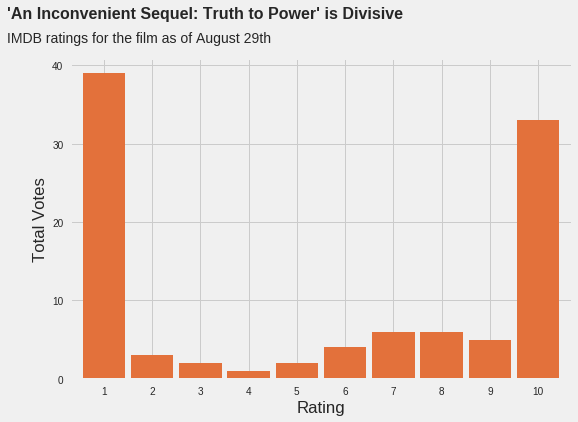

In [72]:
plt.style.use('fivethirtyeight')

ax = fake.plot.bar(color='#E3713B', width=0.88);

ax.set(xlabel = 'Rating',
      ylabel = 'Total Votes',
      yticks = range(0,50,10))

ax.text(x=-2, y=46, s='\'An Inconvenient Sequel: Truth to Power\' is Divisive',
        fontweight='bold', fontsize=16)
ax.text(x=-2, y=43, s='IMDB ratings for the film as of August 29th')

ax.tick_params(labelrotation=0) # in degrees, x-axis ticklabels

In [73]:
display(example)

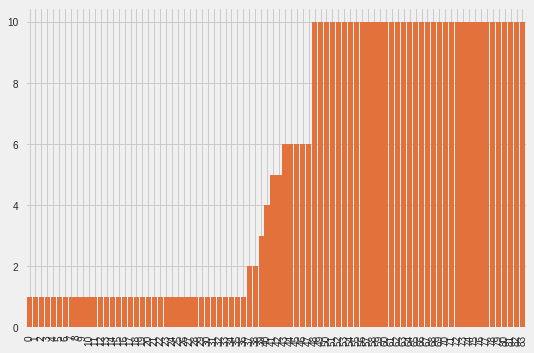

In [74]:
from random import randint
fake2_list = ([1] * randint(20,40)) + ([2] * randint(1,5)) + ([3] * randint(1,5)) + ([4] * randint(1,5)) + ([5] * randint(1,5)) + ([6] * randint(1,5)) + ([10] * randint(20,40))

# print(fake2_list)
fake2 = pd.Series(fake2_list)


fake2.plot.bar(color='#E3713B', width=0.88);

# part two: replicate viz from actual data instead of dummy data

In [75]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

pd.options.display.max_rows = 999

df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [76]:
df.describe()

width, height = df.shape
print(width * height)

2161431


In [77]:
df.sample(1).T

,43857
timestamp,2017-08-16 17:30:06.107139
respondents,2330
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.2
mean,5.5
median,6
1_votes,958
2_votes,62
3_votes,39


In [78]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-10 21:00:06.187783
freq                               1
Name: timestamp, dtype: object

In [79]:
df.timestamp = pd.to_datetime(df.timestamp)

# df.timestamp.describe()

df.set_index('timestamp', inplace=True)

df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


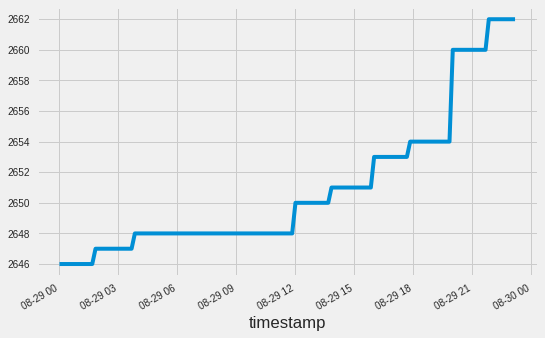

In [80]:
lastday = df['2017-08-29']

lastday[lastday.category=="IMDb users"].respondents.plot();

In [0]:
plt.style.use('fivethirtyeight')


final = df.tail(1)

columns = ['{}_pct'.format(k) for k in range(1,11)]

data = final[columns].T

data.index = range(1,11)

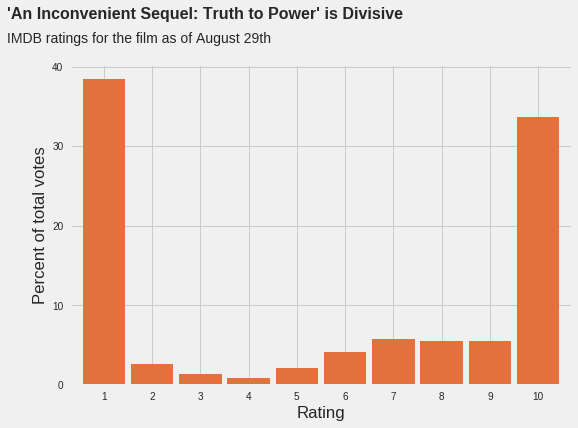

In [82]:
ax = data.plot.bar(color='#E3713B', width=0.88, legend=False);

ax.set(xlabel = 'Rating',
      ylabel = 'Percent of total votes',
      yticks = range(0,50,10))

ax.text(x=-2, y=46, s='\'An Inconvenient Sequel: Truth to Power\' is Divisive',
        fontweight='bold', fontsize=16)
ax.text(x=-2, y=43, s='IMDB ratings for the film as of August 29th')

ax.tick_params(labelrotation=0) # in degrees, x-axis ticklabels



In [83]:
display(example)

In [84]:
c = ['c1'] + (['c2'] * 8) + ['c1']

print(len(c))

10


You have several options from the same article: https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/
- Continue with *‘An Inconvenient Sequel: Truth To Power’ is divisive.* Make your visualization look even more like the original example.
- Reproduce parts of *‘An Inconvenient Sequel’ was doomed before its wide release.* You won’t be able to reproduce the orange line (“Percent of tickets sold”) because FiveThirtyEight didn’t share that data. But you could do the rest.
- Reproduce *Men dominated the IMDb rating for ‘An Inconvenient Sequel’*. Seaborn may help here.
- Reproduce *Women liked ‘An Inconvenient Sequel.’ Men, not so much.* Seaborn may help here too.




In [35]:
import seaborn as sns
from IPython.display import display, Image
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn==0.9.0
assert sns.__version__=='0.9.0'

url2 = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-21.png'
example = Image(url=url2, width=400)

display(example)

In [36]:
# start fresh


doomed = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 50

doomed.describe()

,respondents,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
count,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000
mean,403.390804,5.331478,5.676954,6.023047,159.455074,11.562103,6.996590,3.211722,7.797684,13.441620,18.832449,17.953256,22.565713,141.574594,37.344919,2.230901,1.726936,1.031519,3.169689,3.504594,4.780199,4.800859,5.978127,35.431905
std,544.977400,1.673279,1.602680,3.131885,227.154951,16.120869,8.964425,4.267118,10.633648,19.326537,26.799409,25.398818,28.591822,187.954673,20.080097,2.444295,1.620233,1.438929,3.903391,4.137329,3.798714,5.224808,5.759520,15.814088
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.300000,4.800000,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000,25.000000,0.000000,0.000000,0.000000,0.800000,1.200000,2.200000,2.600000,3.600000,26.300000
50%,244.000000,5.300000,5.500000,6.000000,81.000000,3.000000,4.000000,2.000000,4.000000,6.000000,8.000000,10.000000,16.000000,85.000000,38.600000,2.000000,1.500000,0.600000,1.700000,2.900000,4.200000,4.300000,5.300000,35.500000
75%,518.000000,6.500000,6.600000,9.000000,227.000000,20.000000,10.000000,5.000000,10.000000,19.000000,26.000000,24.000000,32.000000,188.000000,46.000000,3.200000,2.200000,1.400000,3.600000,4.300000,6.800000,5.300000,6.400000,45.100000
max,2662.000000,8.500000,8.600000,10.000000,1021.000000,69.000000,40.000000,25.000000,55.000000,110.000000,154.000000,147.000000,146.000000,897.000000,100.000000,10.300000,9.100000,8.600000,25.000000,50.000000,25.000000,28.600000,33.300000,82.800000


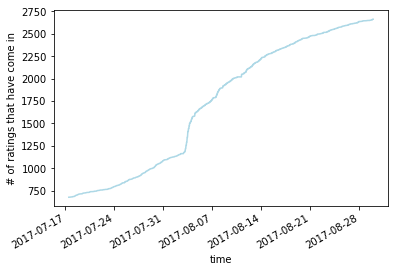

In [56]:
# let's set index to date again. 

doomed.timestamp = pd.to_datetime(doomed.timestamp)

# df.timestamp.describe()

# doomed.set_index('timestamp', inplace=True)

doomed.head()

# print(doomed.timestamp)

# first date is 07-17
# last date is 08-29

first_thru_last = ['2017-07-{}'.format(j) for j in range(17,32)] \
  + ['2017-08-0{}'.format(a) for a in range(1,10)] \
  + ['2017-08-{}'.format(a) for a in range(10,30)]

# print(first_thru_last)

# earliest = doomed['2017-07-17']

# earliest.head()

# doomed.sample(5).T

users_doomed = doomed[doomed.category=='IMDb users']

users_doomed.head()

users_doomed.shape

d_u_ts = users_doomed.set_index('timestamp');

d_u_ts.head()

# users_doomed.respondents.plot(); display(example)

ax2 = d_u_ts.respondents.plot(color='#ADD8E6');


ax2.set(xlabel = 'time', ylabel = '# of ratings that have come in'
        # yticks = ['{}%'.format(n) for n in range(100)]
       ) 
       

# ax2.text(x=0, y=0, s="\'An Inconvenient Sequel\' was doomed before its release",
#         fontweight='bold', fontsize=16)
       
# ax2.text(x=-250, y=2800, s='blal blah subtitle')

# d_u_ts.respondents.plot(color='#ADD8E6');

ax2;

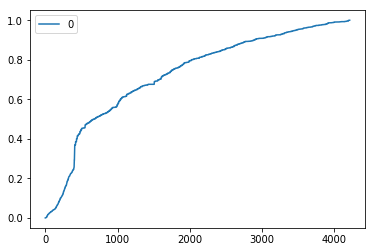

In [29]:
## NORMALIZE


from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = users_doomed[['respondents']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
ud_normalized = pd.DataFrame(x_scaled)



# users_doomed.respondents.plot(); display(example)

# ud_normalized.reshape(-1, 1)



ud_normalized.plot(); display(example)

# [partialsum(range(1,i)) / sum(respondents) for i in respondents]
#### my older hypothesis on the nature of the normalizatoin 


In [46]:
ax = d_u_ts.respondents.plot(color='#ADD8E6')

# users_doomed.respondents.plot(); display(example)

ax.set(xlabel = 'time',
      ylabel = '# of ratings that have come in',
      # yticks = range(0,50,10)) 
      )

ax.text(x=-275, y=3000, s="\'An Inconvenient Sequel\' was doomed before its release",
        fontweight='bold', fontsize=16)
       
ax.text(x=-250, y=2800, s='blal blah subtitle')

# ax.tick_params(labelrotation=0)




# ud_normalized.plot(); display(example)
display(example)


ValueError: ignored

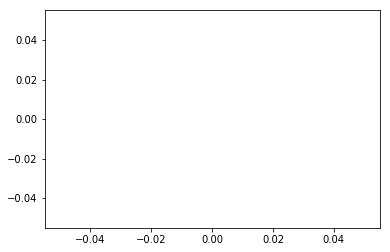

In [42]:
plt.plot(x=users_doomed.timestamp, y=users_doomed.respondents, kind='line');




In [0]:
# sns.pairplot(data=users_doomed[['respondents', 'median']], hue=users_doomed['timestamp']);

In [0]:
# sns.heatmap(users_doomed);

# data=users_doomed.drop('timestamp', axis=1)

# sns.catplot(x=users_doomed.respondents, y=users_doomed['average'], hue=users_doomed.timestamp); 

In [23]:
daily = users_doomed.groupby(by=users_doomed['timestamp']);

daily.head()
# list(daily)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
17,2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
35,2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
53,2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
71,2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
89,2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
107,2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
125,2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
143,2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
161,2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
179,2017-07-17 20:00:05.841494,681,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,307,14,8,5,9,10,18,24,30,256,45.1,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


KeyError: ignored

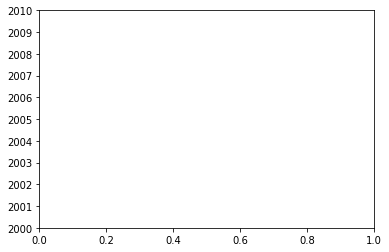

ValueError: ignored

ValueError: ignored